# Earth's radiation budget

## Introduction

The "General Circulation of the Atmosphere" is the science of understanding the mean flow on scales from synoptic to global
- What does it do?
- What does it look like?
- How do all the pieces fit together?

The circulation is fundamentally driven by two factors:
- Differential heating via radiation
- Rotation

In these notes we will begin exploring the first of those two factors: radiation and the energy budget of the Earth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

## Earth's Radiation Budget

:::{figure-md} markdown-fig
<img src="../images/stephens2012.png" alt="Earth's Energy Balance" class="bg-primary mb-1" width="800px">

The global annual mean energy budget of Earth for the approximate period 2000–2010. All fluxes are in W m$^{–2}$. Solar fluxes are in yellow and infrared fluxes in pink. The four flux quantities in purple-shaded boxes represent the principal components of the atmospheric energy balance. Source: {cite:t}`Stephens:2012a`
:::

## Incoming solar radiation

Computing the incident sunlight hitting the Earth is a geometrical problem with a known solution so long as we know the details of the Earth's orbit. For details, see [this lecture in Brian Rose's *The Climate Laboratory*](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/insolation.html#)

In [2]:
fsize = (10,6)

In [3]:
import climlab

lat = np.linspace( -90., 90., 500)
days = np.linspace(0, climlab.utils.constants.days_per_year, 365 )
Q = climlab.solar.insolation.daily_insolation( lat, days )

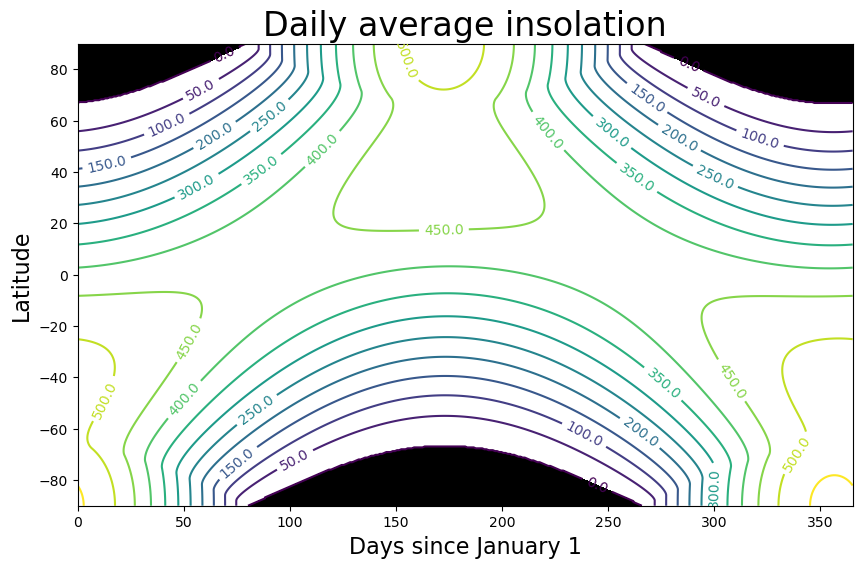

In [4]:
fig, ax = plt.subplots(figsize=fsize)
CS = ax.contour( days, lat, Q , levels = np.arange(0., 600., 50.) )
ax.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax.set_xlabel('Days since January 1', fontsize=16 )
ax.set_ylabel('Latitude', fontsize=16 )
ax.set_title('Daily average insolation', fontsize=24 )
ax.contourf ( days, lat, Q, levels=[-1000., 0.], colors='k' );

## CERES EBAF data

The [CERES-EBAF](https://ceres.larc.nasa.gov) product is described by {cite:t}`Kato:2018a`.

In [5]:
ceres_URL = '/Volumes/roselab_rit/data/CERES_EBAF_Ed4.1_200003-202202.nc'

ceres = xr.open_dataset(ceres_URL)
ceres

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180, time: 264)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2022-02-15
Data variables: (12/41)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_c_mon             (time, lat, lon) float32 ...
    toa_lw_clr_c_mon             (time, lat, lon) float32 ...
    toa_net_clr_c_mon            (time, lat, lon) float32 ...
    ...                           ...
    sfc_net_tot_all_mon          (time, lat, lon) float32 ...
    sfc_net_tot_clr_c_mon        (time, lat, lon) float32 ...
    sfc_net_tot_clr_t_mon        (time, lat, lon) float32 ...
    sfc_cre_net_sw_mon           (time, lat, lon) float32 ...
    sfc_cre_net_lw_mon           (time, lat, lon) float32 ...
    sfc_cre_net_tot_mon          (time, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF TOA and Surface Fluxes. Monthly Averages and 07/...
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date June 8, 2021
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF_L3B004.1

### Computing monthly climatologies of CERES data

We can use Xarray's `groupby` method to easily applying averaging operators over each calendar month.

In [6]:
solar_clim = ceres.solar_mon.mean(dim='lon').groupby("time.month").mean()
solar_clim

<xarray.DataArray 'solar_mon' (month: 12, lat: 180)>
array([[495.6182  , 495.4778  , 495.17365 , ...,   0.      ,   0.      ,
          0.      ],
       [305.63635 , 305.54062 , 305.34952 , ...,   0.      ,   0.      ,
          0.      ],
       [ 58.755447,  59.712624,  61.63352 , ...,  22.853022,  20.908606,
         19.937273],
       ...,
       [212.32726 , 212.25655 , 212.129   , ...,   0.      ,   0.      ,
          0.      ],
       [440.87726 , 440.72968 , 440.47214 , ...,   0.      ,   0.      ,
          0.      ],
       [549.2     , 549.04376 , 548.70966 , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

### The monthly mean insolation as represented in CERES data

In [7]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

<a list of 32 text.Text objects>

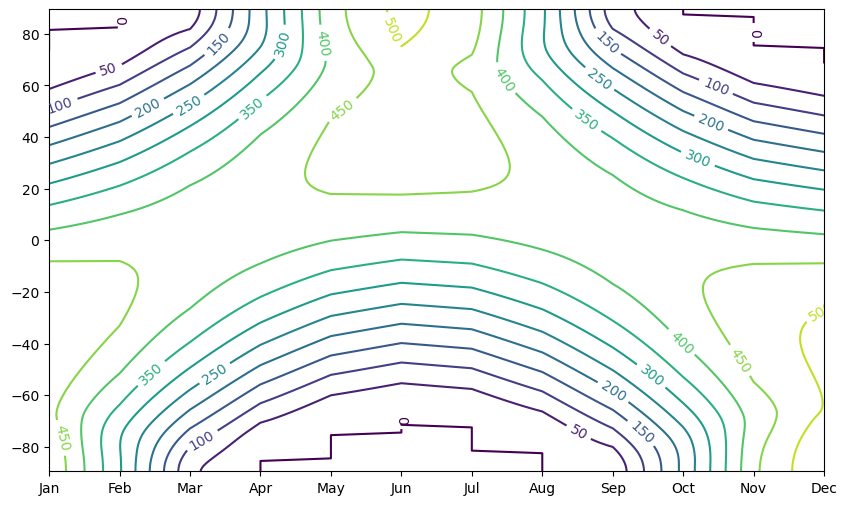

In [8]:
fig, ax = plt.subplots(figsize=fsize)
levels = np.arange(0., 600., 50.)
CS = ax.contour(months, ceres.lat, solar_clim.transpose(), levels=levels)
ax.clabel(CS, CS.levels, inline=True, fontsize=10)

In [9]:
def annual_line_plot(da, title=''):
    '''A little helper function to make some nice line plots of annual means compared to January and July'''
    fig = plt.figure(figsize=fsize)
    da.mean(dim='month').plot(label='Annual', linewidth=3)
    for month_index in [0,6]:
        da.isel(month=month_index).plot(label=months[month_index])
    plt.legend()
    plt.xlim([-90,90])
    plt.grid()
    plt.title(title, fontsize=18);

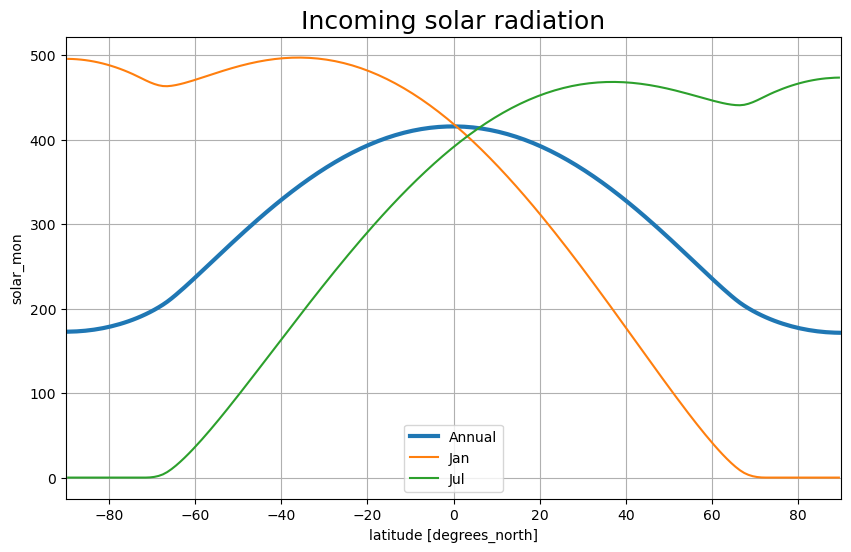

In [10]:
annual_line_plot(solar_clim, title='Incoming solar radiation')

### Albedo

The ratio of outgoing to incoming SW radiation:

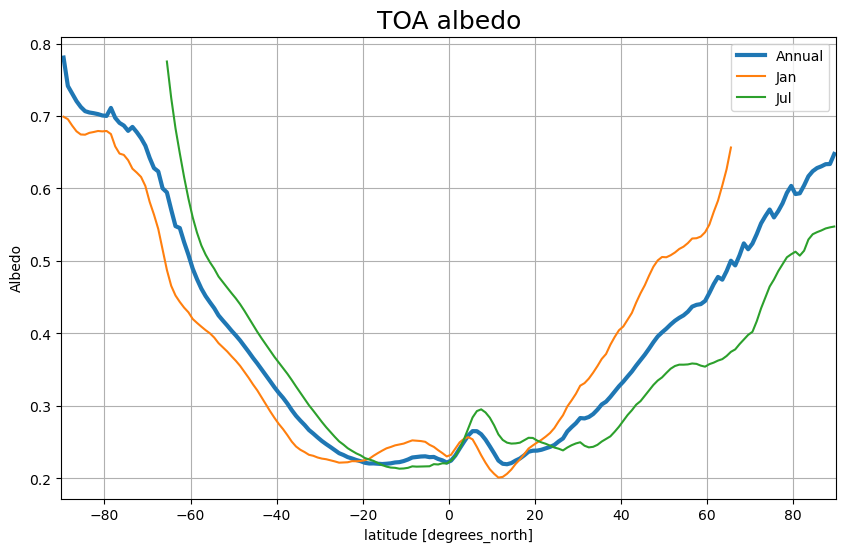

In [11]:
# masking out points where the insolation is near zero
ztoa_sw_all_clim = ceres.toa_sw_all_mon.mean(dim='lon').groupby("time.month").mean()

albedo = ztoa_sw_all_clim / solar_clim.where(solar_clim > 10.)  

annual_line_plot(albedo, title='TOA albedo')
plt.ylabel('Albedo');

### Absorbed shortwave radiation

The residual between what comes in and what goes out:

Text(0, 0.5, 'flux (W m$^{-2}$)')

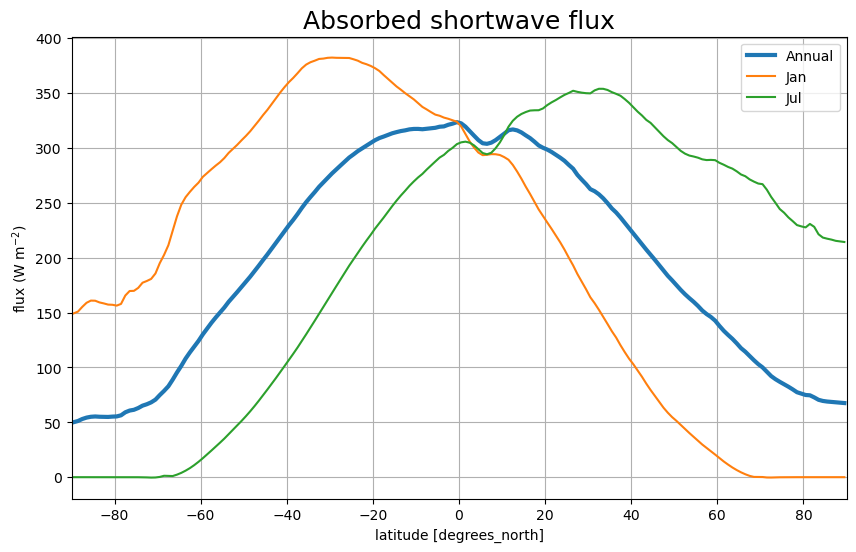

In [12]:
absorbedSW = solar_clim - ztoa_sw_all_clim

annual_line_plot(absorbedSW, title='Absorbed shortwave flux')
plt.ylabel('flux (W m$^{-2}$)')

### Outgoing longwave radiation

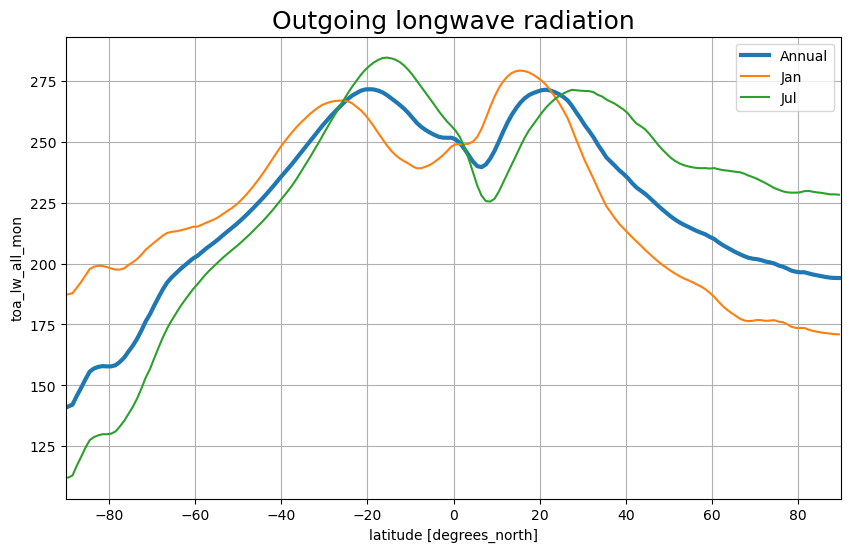

In [13]:
ztoa_lw_all_clim = ceres.toa_lw_all_mon.mean(dim='lon').groupby("time.month").mean()

annual_line_plot(ztoa_lw_all_clim, title='Outgoing longwave radiation')

### Net radiation at TOA

The net radiation is the difference between Absorbed Solar Radiation (ASR) and the Outgoing Longwave Radiation (OLR):

$$ F_{net}^{\downarrow} = F_{SW}^{\downarrow} (1-\alpha) - F_{LW}^{\uparrow} $$

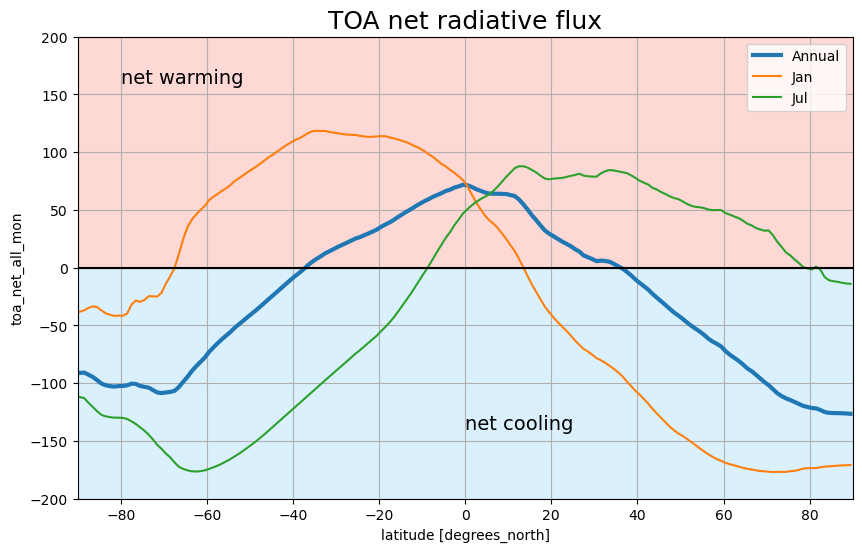

In [14]:
ztoa_net_all_clim = ceres.toa_net_all_mon.mean(dim="lon").groupby("time.month").mean()

annual_line_plot(ztoa_net_all_clim, title='TOA net radiative flux')
ylim = [-200, 200]
plt.plot([-90,90], [0,0], color='black')
plt.fill_between([-90,90], [ylim[0], ylim[0]], alpha=0.3, color='lightskyblue')
plt.text(-80, 160, 'net warming', fontsize=14)
plt.fill_between([-90,90], [ylim[1], ylim[1]], alpha=0.3, color='salmon')
plt.text(0, -140, 'net cooling', fontsize=14)
plt.ylim(ylim);

## Hemispheric energy balance

:::{figure-md} markdown-fig
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0169809515002070-gr3.jpg" alt="Earth's Hemispheric Energy Balance" class="bg-primary mb-1" width="400px">

The annual-hemispheric mean energy balance of Earth. Unless specified otherwise, all TOA and surface numbers are in W m$^{−2}$. Fluxes of sunlight entering and leaving the TOA and surface are in yellow and infrared fluxes are red. No hemispheric surface turbulent fluxes are given. Source: {cite:t}`Stephens:2015a`
:::

### Energy storage by latitude and season

#### A published version

:::{figure-md} markdown-fig
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0169809515002070-gr7.jpg" alt="Heat storage of the Earth–atmosphere system" class="bg-primary mb-1" width="400px">

Heat storage of the Earth–atmosphere system according to a 14 year average of CERES TOA net flux (in W m$^{−2}$) as a function of latitude and season. Source: {cite:t}`Stephens:2015a`
:::

#### And our own version based on the full CERES-EBAF dataset

Text(0.5, 1.0, 'Heat storage of the climate system')

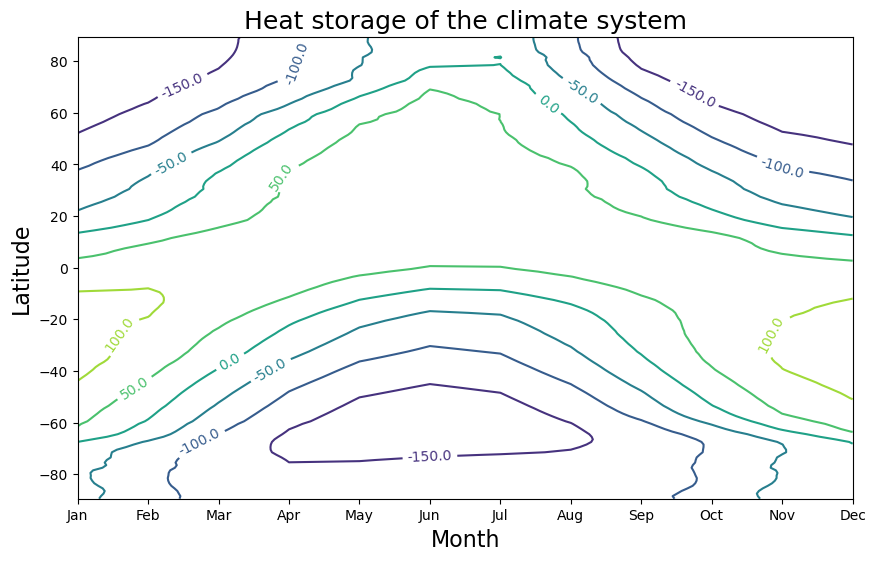

In [15]:
fig, ax = plt.subplots(figsize=fsize)
CS = ax.contour(months, ceres.lat, ztoa_net_all_clim.transpose())
ax.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax.set_xlabel('Month', fontsize=16 )
ax.set_ylabel('Latitude', fontsize=16 )
ax.set_title('Heat storage of the climate system', fontsize=18 )

### Meridional energy transport

:::{figure-md} markdown-fig
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0169809515002070-gr8.jpg" alt="Seasonal heat transport" class="bg-primary mb-1" width="400px">

The late February and August seasonal total heat transport: (a) shows the seasonal transports as highlighted and their average (thin solid line) contrasted against the heavy solid line representing the 14 year annual mean. The slight non-zero transport at the SH pole for both is indicative of the heat gained by the system. (b) The seasonal transports as in (b) highlighting the Tropical Trough Zone (TTZ) as a gray shaded region between 12 S and 20 N. Source: {cite:t}`Stephens:2015a`
:::



### Precipitation and the ITCZ

:::{figure-md} markdown-fig
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs00382-013-1767-z/MediaObjects/382_2013_1767_Fig1_HTML.gif?as=webp" alt="Annual mean precipitation" class="bg-primary mb-1" width="800px">

The annual mean precipitation from the National Oceanographic and Atmospheric Administration’s Climate Prediction Center’s (NOAACPC) merged analysis (Xie and Arkin 1996). Blue lines indicate the meridional location of the maximum in the Tropics at each longitude. The zonal mean is shown on the left and is co-plotted with the zonal mean of the local maximum (blue lines) and the precipitation centroid (dashed black lines). Source: {cite:t}`Marshall:2014a`
:::



## Inferring energy transport from net radiation

Consider the energy budget of a column:

$$ \frac{\partial E}{\partial t} = F_{net}^{\downarrow} - \nabla \cdot (\vec{v} E) $$

where
- $E$ is the energy per unit area stored in the column
- $F_{net}^{\downarrow}$ is the net downward flux of energy at TOA
- $\vec{v} E$ is the total flux of the energy by the fluid atmosphere and ocean

Averaging over a long period of time, the left hand side is negligible so that

$$ \overline{F_{net}^{\downarrow}} = \overline{\nabla \cdot (\vec{v} E)} $$

And we can expand the flux divergence in spherical coordinates as ... *(unfinished)*